<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Credit Card Approval Prediction</center></h1>

<a id="Introduction"></a>
<div class="Introduction" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>Introduction</center></h1>
  <ul>
  <li>
    Imagine you really want a new credit card, but you're worried that applying for one might make your score go down. That's kind of like your "report card" for how good you are with money.

   </li>
  <li>
    Well, this special app can help you figure out if you'll get approved for a credit card without having to actually apply for one. That way, your score won't go down just from checking.


   </li>
  <li>
    The app does this by looking at things like how good you are at paying your bills on time, how long you've had a credit card, and stuff like that. It can tell you if the bank is likely to say "yes" to you without you having to go through the whole application process.


   </li>
  <li>
    That way, you can feel more confident about applying for a credit card, because you'll know ahead of time if you're going to get approved. And you won't have to worry about your credit score going down just from checking.

   </li>
  </ul>
  </div>

<a id="Features"></a>
<div class="Features" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>Features Of Application record</center></h1>
  <ul>
    <li > ID: Client Number</li>
    <li>CODE_GENDER: Gender</li>
    <li>FLAG_OWN_CAR: Is there a car</li>
    <li>FLAG_OWN_REALTY: Is there a property</li>
    <li>CNT_CHILDREN: Number of children</li>
    <li>AMT_INCOME_TOTAL: Annual income</li>
    <li>NAME_INCOME_TYPE: Income category</li>
    <li>NAME_EDUCATION_TYPE: Education level</li>
    <li>NAME_FAMILY_STATUS: Marital status</li>
    <li>NAME_HOUSING_TYPE: Way of living</li>
    <li>DAYS_BIRTH: Birthday, Count backwards from current day (0), -1 means yesterday</li>
    <li>DAYS_EMPLOYED: Start date of employment, Count backwards from current day(0). If positive, it means the person currently unemployed.</li>
    <li>FLAG_MOBIL: Is there a mobile phone</li>
    <li>FLAG_WORK_PHONE: Is there a work phone</li>
    <li>FLAG_PHONE: Is there a phone</li>
    <li>FLAG_EMAIL: Is there an email</li>
    <li>OCCUPATION_TYPE: Occupation</li>
    <li>CNT_FAM_MEMBERS: Family size</li>
  </ul>
</div>

<a id="Features"></a>
<div class="Features" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <h1><center>Features Of Credit record</center></h1>
      <ul>
        <li > ID: Client Number</li>
        <li>MONTHS_BALANCE: Record month, The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</li>
        <li>STATUS: Status, 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month</li>
      </ul>
</div>

<a id="Goal"></a>
<div class="Goal" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>Goal</center></h1>
  <ul>
    <li > Build a predictive model able to predict whether an application for a credit card will be approved or not, using the applicant data.</li>
  </ul>
</div>  

In [28]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
!ls /content/drive/
!ls /content/drive/MyDrive/
!ls /content/drive/MyDrive/Datasets/

MyDrive
'120 Rocks'						       mds_360.txt
'120 Rocks Que 7'					      'Meranago Cave.gsheet'
 1.txt							       modified_train.csv
 20240227-hra-bigquery-export.xlsx			      'MS 2023 Fall.gsheet'
'2024 Expenditure.gsheet'				       Network.csv
'360 Rocks'						       Network_Dataset_24April.csv
'360 Rocks Que 7'					       network_of_three.csv
'41217_Vishwajeet Amar Ekal.pdf'			      'OG_CV_VISH (Autosaved).gdoc'
'41217_Vishwajeet Amar Ekal_Resume.pdf'			       R1.csv
'Amazon Sales 2023'					       R2.csv
'CamScanner 04-15-2020 19.48.04.pdf'			       R3.csv
 Classroom						       Resume
'Colab Notebooks'					      'Shortlisted Colleges.gsheet'
 creditcard.csv						       ShruBal.xlsx
 DATASET						       TestData.csv
 DATASET_23APRIL.csv					      'The Book of Ramen (1).pdf'
 DATASET_23APRIL.xlsx					      'The Book of Ramen.pdf'
'Datasets '						      'Untitled document.gdoc'
 data_time_29_March.csv					      'Untitled spreadsheet (1).gsheet'
 Detailed_Final_Project_Report_Presenta

<a id="Importing"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Importing Important Libraries</center></h1>

In [3]:
# Analysis Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
%matplotlib inline
import datetime
from datetime import date,timedelta
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Modeling Packages
from sklearn.impute import SimpleImputer
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler , TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Evaluation Metrices
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Helper Function</center></h1>

In [4]:
# calculate age of customer from birth day
def cal_app_age(day_num):
    birth_day = np.abs(day_num) / 365.25
    return int(birth_day)

# calculate employee len of cutomer
def cal_employed_len(day_num):
    if day_num >= 0:
        return 0
    else:
        employed_len = np.abs(day_num) / 365.25
        return round(employed_len,2)

# Edit NAME_EDUCATION_TYPE
def education_type(edu_type):
    if edu_type == 'Secondary / secondary special':
        edu_type = edu_type.split(' /')[0]
    return edu_type

# Edit NAME_FAMILY_STATUS
def family_status(fam_status):
    if fam_status == 'Single / not married':
        fam_status = fam_status.split(' /')[0]
    return fam_status

# Edit NAME_HOUSING_TYPE
def house_type(house_type):
    if house_type == 'House / apartment':
        house_type = house_type.split(' /')[1].strip()
    return house_type

# function to convert Discrete Numerical Columns to categories
def convert_dtype(list):
    for col in list:
        application_record[col] = application_record[col].astype(str)

# function to convert from float dtype to int dtype
def convert_float_int(cnt_family):
    return int(cnt_family)

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Overview</center></h1>

In [32]:
# Reading Dataset
application_record = pd.read_csv('drive/MyDrive/Datasets/application_record.csv', encoding = 'utf-8', sep=',')
credit_record = pd.read_csv('drive/MyDrive/Datasets/credit_record.csv', encoding = 'utf-8', sep=',')

In [33]:
# head: to show first five rows in our data
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [34]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [35]:
# Shape: to know number of rows and columns for every dataset
(application_record.shape, credit_record.shape)

((438557, 18), (1048575, 3))

In [36]:
credit_record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

## Our first dataset don't have target,
- a client who will not default on their credit card would be called a good client
- so we will use Credit_record to come up with target variable, we will use <font color = 'blue'>vintage analysis </font>

## Vintage analysis:
- Used to track the performance of group of credit accounts over time starting from those accounts opened
- Some key things they'll monitor in a vintage analysis:
  * Delinquency rates - What percentage of the accounts become 30/60/90 days past due over time?
  * Charge-off rates - What percentage of the accounts end up charged off (written off as uncollectible debt)?
  * Utilization rates - How much of their available credit limit do the customers in this vintage end up using?

- By tracking the same group of accounts over time, the bank can spot trends, like we see the cohort or group we track them have high delinquencies after 6 months compared to previous vintages

- we will say that the applicants over 60 days overdue are considered bad clients, and applicants with less than or equal 60 days

## Merge Between two datasets and make it labeled

In [37]:
# we want to get the age of account for every Unique ID
begin_month = pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month = begin_month.rename(columns={'MONTHS_BALANCE':'Account_Age'})
begin_month

,Account_Age
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [38]:
# We do left join of app_record with Account_Age
application_record = pd.merge(application_record, begin_month, how = 'left', on = 'ID')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [39]:
# now we want to determine whose bad or good applicants

# define null column called Applicant_Category
credit_record['CUSTOMER_CAtEGORY'] = None

# determine bad or risky applicants
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '2'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '3'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '4'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '5'] = 'Yes'

# display applicant_cateogry column
credit_record['CUSTOMER_CAtEGORY'].unique()

array([None, 'Yes'], dtype=object)

In [40]:
# New data frame to contain our target column
target = credit_record.groupby('ID').count()
target

,MONTHS_BALANCE,STATUS,CUSTOMER_CAtEGORY
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0
...,...,...,...
5150482,18,18,0
5150483,18,18,0
5150484,13,13,0


In [41]:
target['CUSTOMER_CAtEGORY'][target['CUSTOMER_CAtEGORY'] > 0] = 'bad'
target['CUSTOMER_CAtEGORY'][target['CUSTOMER_CAtEGORY'] == 0] = 'good'

In [42]:
target

,MONTHS_BALANCE,STATUS,CUSTOMER_CAtEGORY
ID,,,
5001711,4,4,good
5001712,19,19,good
5001713,22,22,good
5001714,15,15,good
5001715,60,60,good
...,...,...,...
5150482,18,18,good
5150483,18,18,good
5150484,13,13,good


In [43]:
# we wamt Applicant_Category 'Target' to merge it with other dataframe
target = target[['CUSTOMER_CAtEGORY']]
target

,CUSTOMER_CAtEGORY
ID,
5001711,good
5001712,good
5001713,good
5001714,good
5001715,good
...,...
5150482,good
5150483,good
5150484,good


In [44]:
# merge two dataframes
application_record = pd.merge(application_record, target, how = 'inner', on = 'ID')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,good


In [45]:
application_record.shape

(36457, 20)

## Edit Some Features

In [46]:
# employed day for applicant
application_record['DAYS_EMPLOYED'] = application_record['DAYS_EMPLOYED'].apply(cal_employed_len)

# add age column will help us which age do more risks
application_record['DAYS_BIRTH'] = application_record['DAYS_BIRTH'].apply(cal_app_age)

# Edit NAME_EDUCATION_TYPE
application_record['NAME_EDUCATION_TYPE'] = application_record['NAME_EDUCATION_TYPE'].apply(education_type)

# Edit NAME_FAMILY_STATUS
application_record['NAME_FAMILY_STATUS'] = application_record['NAME_FAMILY_STATUS'].apply(family_status)

# Edit NAME_HOUSING_TYPE
application_record['NAME_HOUSING_TYPE'] = application_record['NAME_HOUSING_TYPE'].apply(house_type)

# Edit CNT_FAM_MEMBERS
application_record['CNT_FAM_MEMBERS'] = application_record['CNT_FAM_MEMBERS'].apply(convert_float_int)

# rename some columns
application_record = application_record.rename(columns = {'DAYS_BIRTH':'CUSTOMER_AGE','DAYS_EMPLOYED':'EMPLOYED_LENGTH'})

In [47]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.44,1,1,0,0,NaN,2,-15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.44,1,1,0,0,NaN,2,-14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,apartment,58,3.10,1,0,0,0,Security staff,2,-29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,apartment,52,8.35,1,0,1,1,Sales staff,1,-4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,apartment,52,8.35,1,0,1,1,Sales staff,1,-26.0,good


In [48]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  CUSTOMER_AGE         36457 non-null  int64  
 11  EMPLOYED_LENGTH      36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [49]:
unique_count = pd.DataFrame([(col,application_record[col].nunique())for col in application_record.columns], columns = ['Column_Name','Number_unique']).sort_values(by=['Number_unique'])
unique_count

,Column_Name,Number_unique
12,FLAG_MOBIL,1
19,CUSTOMER_CAtEGORY,2
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [50]:
# convert some numerical columns to categorical column like ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
list = ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
convert_dtype(list)

In [51]:
application_record.dtypes

,0
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


In [52]:
# select categorical columns to get describe for them
application_record.select_dtypes(exclude = np.number).columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CUSTOMER_CAtEGORY'],
      dtype='object')

In [53]:
application_record.describe(include = 'O')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CUSTOMER_CAtEGORY
count,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,25134,36457
unique,2,2,2,5,5,5,6,1,2,2,2,18,2
top,F,N,Y,Working,Secondary,Married,apartment,1,0,0,0,Laborers,good
freq,24430,22614,24506,18819,24777,25048,32548,36457,28235,25709,33186,6211,35841


In [54]:
# show unique values of columns has object dtype
for col in application_record.columns:
    if application_record[col].dtype == object:
        print(str(col) + ' : ' + str(application_record[col].unique()))
        print(application_record[col].value_counts())
        print('-'*60)

CODE_GENDER : ['M' 'F']
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_CAR : ['Y' 'N']
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_REALTY : ['Y' 'N']
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64
------------------------------------------------------------
NAME_INCOME_TYPE : ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64
------------------------------------------------------------
NAME_EDUCATION_TYPE : ['Higher education' 'Secondary' 'Incomplete higher' 'Lower secondary'
 'Academic degree']
NAME_EDUCATION_TYPE
Secondary            24777
Higher education      9864
Incomplete higher     1

In [55]:
# select numerical columns to get describe for them
application_record.select_dtypes(include = np.number).columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CUSTOMER_AGE',
       'EMPLOYED_LENGTH', 'CNT_FAM_MEMBERS', 'Account_Age'],
      dtype='object')

In [56]:
application_record.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
ID,36457.000000,5078226.996544,41875.240788,5008804.000000,5042028.000000,5074614.000000,5115396.000000,5150487.000000
CNT_CHILDREN,36457.000000,0.430315,0.742367,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,36457.000000,186685.736662,101789.226482,27000.000000,121500.000000,157500.000000,225000.000000,1575000.000000
CUSTOMER_AGE,36457.000000,43.232027,11.503981,20.000000,34.000000,42.000000,53.000000,68.000000
EMPLOYED_LENGTH,36457.000000,6.024156,6.479909,0.000000,1.120000,4.250000,8.630000,43.020000
CNT_FAM_MEMBERS,36457.000000,2.198453,0.911686,1.000000,2.000000,2.000000,3.000000,20.000000
Account_Age,36457.000000,-26.164193,16.501854,-60.000000,-39.000000,-24.000000,-12.000000,0.000000


In [57]:
# show unique values of columns has int or floar dtype
for col in application_record.columns:
    if application_record[col].dtype == np.float64 or application_record[col].dtype == np.int64:
        print(str(col) + ' : '+ str(application_record[col].unique()))
        print(application_record[col].value_counts())
        print('-' * 60)

ID : [5008804 5008805 5008806 ... 5149838 5150049 5150337]
ID
5008804    1
5096993    1
5096983    1
5096987    1
5096988    1
          ..
5050819    1
5050815    1
5050813    1
5050812    1
5150337    1
Name: count, Length: 36457, dtype: int64
------------------------------------------------------------
CNT_CHILDREN : [ 0  1  3  2  4  5 14 19  7]
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64
------------------------------------------------------------
AMT_INCOME_TOTAL : [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
  

In [58]:
# check duplicates rows
application_record.duplicated().sum()

0

In [59]:
# check percentage of null values in each column
grouped_data = []
for col in application_record.columns:
    num_missing = application_record[col].isnull().sum()
    percentage = round((num_missing / application_record.shape[0])*100,2)
    grouped_data.append([col, num_missing, percentage])

# display them in dataframe
grouped_df = pd.DataFrame(grouped_data,columns= ['Column', 'num_missing', 'percentage'])
grouped_df

,Column,num_missing,percentage
0,ID,0,0.00
1,CODE_GENDER,0,0.00
2,FLAG_OWN_CAR,0,0.00
3,FLAG_OWN_REALTY,0,0.00
4,CNT_CHILDREN,0,0.00
5,AMT_INCOME_TOTAL,0,0.00
6,NAME_INCOME_TYPE,0,0.00
7,NAME_EDUCATION_TYPE,0,0.00
8,NAME_FAMILY_STATUS,0,0.00
9,NAME_HOUSING_TYPE,0,0.00


<a id="EDA"></a>
<div class="EDA (Exploratory Data Analysis)" style="background-color:#F5F5DC; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1><center>EDA (Exploratory Data Analysis)</center></h1>


<div style="background-color:#DC143C; color:black; padding: 5px; margin: 5px; font-size: 110%; border-radius: 15px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);"><h3 style="color: white;"><center>Bussiness Questions<center></h3>
  </div>

<div style="background-color:#DC143C; color:black; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">  
  <ol>
    <li style="color: white;"> Which Gender Treat more with Bank?</li>
    <li style="color: white;"> Which Gender has higher Delinquency rate?</li>
    <li style="color: white;">Which MartialStatus has the highest Delinquency rate?</li>
    <li style="color: white;">Is relationship between increasing customer's childern and loans?</li>
    <li style="color: white;">What's relationship between Employed Length and Customer Cateogry?</li>
    <li style="color: white;">Which Age has higher Delinquency rate or more risky?</li>
    <li style="color: white;">Is there a relationship Education Type and Annual Income within Customer type?</li>
    <li style="color: white;">Highest Occupation Type Bank has?</li>
    <li style="color: white;">Which age has higher annual income with in gender?</li>
    <li style="color: white;">Is relationship between bigger Family members and Customer Category?</li>
    <li style="color: white;">Is Customer has car and apartment lower risky or good customer?</li>
    <li style="color: white;">When Account Age Increase Thats Means a Good Customer Category</li>
  </ol>
</div>

</div>

In [60]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

## **1) Which Gender Treat more with Bank?**

In [61]:
application_record['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,24430
M,12027


In [62]:
total_records = len(application_record)
gender_counts = application_record["CODE_GENDER"].value_counts()
gender_percent = (gender_counts["F"] / total_records) * 100

fig = px.pie(values=[gender_percent, 100 - gender_percent], names=["Female", "Male"],
             title="<b>"+'Gender percentage',
             color_discrete_sequence=[ "#1f77b4" ,"#d62728" ])

fig.update_traces(textinfo="percent+label", pull=[0.2, 0], textposition="inside")
fig.update_layout(legend_title="Gender", height=600, title_x=0.5, title_font_color="black",title_font_size=27)

# Show the plot
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see the females are more likely to apply for credit cards as we have 67 % customers females from the data apply for credit cards may be the Bank offers low budget loans that suits females interest than males.. we are going to see if there is another factors that makes why males are smaller segments</b></font>
</div>  

### **2) Which Gender has higher Delinquency rate?**

In [63]:
# Group by 'CUSTOMER_CAtEGORY' and count 'CODE_GENDER'
gender_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['CODE_GENDER'].value_counts())
gender_cat = gender_cat.rename(columns={'CODE_GENDER': 'Count'})
gender_cat = gender_cat.reset_index()
gender_cat

,CUSTOMER_CAtEGORY,CODE_GENDER,count
0,bad,F,379
1,bad,M,237
2,good,F,24051
3,good,M,11790


In [64]:
fig = px.histogram(gender_cat, x='CODE_GENDER', y = 'count',color='CUSTOMER_CAtEGORY', barmode='group',color_discrete_sequence=['#d62728','#80AEBD'],title="<b>"+'Gender VS Customer Category',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CUSTOMER_CAtEGORY',
yaxis_title='count',
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see the we have overall bad customers but which gender has higher bad type female, but if we see this as ratio we found males has higher bad rate related to there number, so we can say we have higher bad customer type from males, may be it's responsible for a family? let,s check that</b></font>
</div>    

## **3) Which MartialStatus has the highest Delinquency rate?**

In [65]:
# Group by 'CUSTOMER_CAtEGORY' and count 'NAME_FAMILY_STATUS'
martial_status_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['NAME_FAMILY_STATUS'].value_counts())
martial_status_cat = martial_status_cat.rename(columns={'NAME_FAMILY_STATUS': 'Count'})
martial_status_cat = martial_status_cat.reset_index()
martial_status_cat

,CUSTOMER_CAtEGORY,NAME_FAMILY_STATUS,count
0,bad,Married,393
1,bad,Single,101
2,bad,Civil marriage,46
3,bad,Widow,45
4,bad,Separated,31
5,good,Married,24655
6,good,Single,4728
7,good,Civil marriage,2899
8,good,Separated,2072
9,good,Widow,1487


In [66]:
fig = px.bar(martial_status_cat, x='NAME_FAMILY_STATUS', y = 'count',color='CUSTOMER_CAtEGORY', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'Martial Status Vs Customer Category',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>The Married are the highest customer segment apply for credit cards, and highest segment has good and bad category may be have childerns and offers bank, Bank should also taking care of offers thats suits others catgories as the singles are second most category of bad customers</b></font>
</div>    

## **4) Is relationship between increasing customer's childern and loans?**

In [67]:
# Get Females and put them in new dataframe
application_record.groupby(['CODE_GENDER','CNT_CHILDREN'])[['ID']].count()

ID
CODE_GENDER CNT_CHILDREN       
F           0             17519
            1              4709
            2              1884
            3               257
            4                47
            5                11
            7                 2
            19                1
M           0              7682
            1              2783
            2              1372
            3               162
            4                16
            5                 9
            14                3

In [68]:
sunbrust_gr = application_record.loc[:,['CODE_GENDER','CNT_CHILDREN']]

In [69]:
fig = px.sunburst(sunbrust_gr,path=['CODE_GENDER','CNT_CHILDREN'],title="<b>"+"Customer's Childern VS Loans",template="plotly" , color_discrete_sequence=["#78b4d5", "#d57f86"])
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
    height=600,
    title_font_color="black",
    template="plotly",
    title_font_size=27,
    hoverlabel_font_size=20,
    title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see the Most customers apply for credit cards from both gender married and have no childerns, and also customers has number of childerns nore than two less apply to credit card means when when number of childern increase number for applying credit card decrease</b></font>
</div>    

## **5) What's relationship between Employed Length and Customer Cateogry?**

In [70]:
# Group by 'CUSTOMER_CAtEGORY' and count 'EMPLOYED_LENGTH'
emp_len_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['EMPLOYED_LENGTH'].value_counts())
emp_len_cat = emp_len_cat.rename(columns={'EMPLOYED_LENGTH': 'Count'})
emp_len_cat = emp_len_cat.reset_index()
emp_len_cat

,CUSTOMER_CAtEGORY,EMPLOYED_LENGTH,count
0,bad,0.00,113
1,bad,1.37,9
2,bad,2.18,9
3,bad,1.60,8
4,bad,8.26,7
...,...,...,...
2156,good,12.53,1
2157,good,3.91,1
2158,good,11.99,1
2159,good,11.87,1


In [71]:
import plotly.figure_factory as ff


emp_len_cat_good = emp_len_cat[emp_len_cat['CUSTOMER_CAtEGORY'] == 'good']
x1 = emp_len_cat_good['EMPLOYED_LENGTH']

emp_len_cat_bad = emp_len_cat[emp_len_cat['CUSTOMER_CAtEGORY'] == 'bad']
x2 = emp_len_cat_bad['EMPLOYED_LENGTH']

group_labels = ['good', 'bad']

colors = ['magenta','slategray']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2], group_labels, bin_size=.5,
                         curve_type='normal', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
title_text="<b>" + " Employed Length Vs Customer Category",
xaxis_title='EMPLOYED_LENGTH',
yaxis_title='count',
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>Graph when employed length become small number of customers apply for credit card become huge for both customers types and specifically for bad customers, so bank should may be give credit card to customers not less than 8 years that will be better maybe</b></font>
</div>    

## **6) Which Age has higher Delinquency rate or more risky?**

In [72]:
# Group by 'CUSTOMER_CAtEGORY' and count 'EMPLOYED_LENGTH'
customer_age_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['CUSTOMER_AGE'].value_counts())
customer_age_cat = customer_age_cat.rename(columns={'CUSTOMER_AGE': 'Count'})
customer_age_cat = customer_age_cat.reset_index()
customer_age_cat

,CUSTOMER_CAtEGORY,CUSTOMER_AGE,count
0,bad,51,27
1,bad,33,27
2,bad,30,26
3,bad,29,25
4,bad,28,22
...,...,...,...
90,good,22,151
91,good,67,124
92,good,68,26
93,good,21,10


In [73]:
fig = px.bar(customer_age_cat[customer_age_cat['CUSTOMER_CAtEGORY'] == 'bad'], x='CUSTOMER_AGE', y = 'count', barmode='group',color_discrete_sequence= ['#FF5733'] ,title="<b>"+"Customer's Age with Bad Type",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CUSTOMER_AGE',
yaxis_title='count',
height = 600,
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>Graph Shows there isn't pattern here, but as we see most two ages apply for credit cards are (33 , 51)</b></font>
</div>    

## **7) Is there a relationship Education Type and Annual Income within Customer type?**

In [74]:
# lets see average annual income for every eduaction type
avg_annual_income = round(application_record.groupby(['CUSTOMER_CAtEGORY','NAME_EDUCATION_TYPE'])[['AMT_INCOME_TOTAL']].mean(),2)
avg_annual_income = avg_annual_income.reset_index()
avg_annual_income

,CUSTOMER_CAtEGORY,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,bad,Higher education,228901.00
1,bad,Incomplete higher,165545.45
2,bad,Lower secondary,137610.00
3,bad,Secondary,170426.68
4,good,Academic degree,247500.00
5,good,Higher education,223642.51
6,good,Incomplete higher,202528.76
7,good,Lower secondary,141771.02
8,good,Secondary,171706.08


In [75]:
fig = px.histogram(avg_annual_income, x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE", facet_col="CUSTOMER_CAtEGORY" ,orientation="h", color="CUSTOMER_CAtEGORY" ,text_auto= True , title="<b>"+'Eduaction Type Vs Income with in Customer Category' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='AMT_INCOME_TOTAL',
yaxis_title='NAME_EDUCATION_TYPE',
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>Graph Shows that the higher average annual income for higher education for bad customer and academic degree for good customer, and reason i took average instead of sum, becasue the sum isn't good kpi for us because it depends on which customer segment is bigger, when i got sum it gave the biggest total annual income for Secondary Eduaction Type, so i use average</b></font>
</div>    

## **8) Highest Occupation Type Bank has?**

In [76]:
fig=px.histogram(application_record,x="OCCUPATION_TYPE",title="<b>Distribution Of Occupation Type ",
                color_discrete_sequence=px.colors.qualitative.Vivid,barmode = 'group', text_auto= True )
fig.update_layout(template="plotly")
fig.update_layout(title_font_size=27,title_x= 0.5, title_font_color = 'black',height = 500)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>Distribuation tells us the Laborers, core staff and sales staff, Managers most four occupations type apply for credit cards</b></font>
</div>    

## **9) Which age has higher annual income with in gender?**

In [77]:
# sort dataframe using age, then group by age, and get avg annual income for each age
age_annual_income = application_record.sort_values(by='CUSTOMER_AGE').groupby(['CODE_GENDER','CUSTOMER_AGE'])[['AMT_INCOME_TOTAL']].mean().reset_index()
age_annual_income = age_annual_income.rename(columns = {'AMT_INCOME_TOTAL':'AMT_INCOME_AVG'})
age_annual_income

,CODE_GENDER,CUSTOMER_AGE,AMT_INCOME_AVG
0,F,20,112500.000000
1,F,21,147214.285714
2,F,22,131450.704225
3,F,23,151695.000000
4,F,24,147319.489933
...,...,...,...
92,M,64,239102.608696
93,M,65,109215.000000
94,M,66,163583.333333
95,M,67,151670.454545


In [78]:
fig_bubble = px.scatter(age_annual_income, x="CUSTOMER_AGE", y="AMT_INCOME_AVG", size="AMT_INCOME_AVG", color="CODE_GENDER", title="<b>"+'Customer Age Vs Average Annual Income within Gender',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=27)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CUSTOMER_AGE',
yaxis_title='AMT_INCOME_AVG',
height = 600
)
fig_bubble.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see from graph shows average annual income for males bigger than females, so this may be reason that females apply for credit card more than males, and the graph shows also after the age 50 the average annual income for both males and females go downm there is also outliers in males average annual income for one male at age 68</b></font>
</div>    

## **10) Is relationship between bigger Family members and Customer Category?**

In [79]:
fig=px.histogram(application_record,x="CNT_FAM_MEMBERS",color = 'CUSTOMER_CAtEGORY',title="<b>Distribution Of Family Members Vs Customer Cateogry",
                color_discrete_sequence=px.colors.qualitative.Vivid,barmode = 'group', text_auto= True, marginal="box")
fig.update_layout(template="plotly")
fig.update_layout(title_font_size=27,title_x= 0.5, title_font_color = 'black',height=500)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see from graph shows most customers apply for credit cards have family size from 1 to 4 either good or bad, but also when family bigger than 6 there is no bad customers and also no of customers apply for credit cards becomes smaller</b></font>
</div>    

## **11) Is Customer has car and apartment lower risky or good customer?**

In [80]:
# Create histograms for Customer Catogery by own car and house type
fig = px.histogram(application_record, x="NAME_HOUSING_TYPE", color="CUSTOMER_CAtEGORY",
                   #
                   facet_col="FLAG_OWN_CAR",
                   title="<b>Customer Category by House Type and Flag Own Car",
                   color_discrete_sequence=px.colors.qualitative.Pastel, text_auto=True)

# Customize the plot
fig.update_layout(xaxis_title="NAME_HOUSING_TYPE", yaxis_title="Count",title_x = 0.5, title_font_color = 'black', title_font_size=27,height = 600)
fig.update_xaxes(matches='x')
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>As we see from graph shows Customers have apartment customers apply for credit cards than others, and customers which have apartment and no car most one, so we conclude that customer had car and apartment most of them good customers and also less to apply for credit card</b></font>
</div>  

## **12) When Account Age Increase Thats Means a Good Customer Category?**

In [81]:
fig = px.histogram(application_record, x='Account_Age',color = 'CUSTOMER_CAtEGORY',facet_col="CUSTOMER_CAtEGORY", title="<b>"+'Account Age Vs Customer Catgeory', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Account_Age',
yaxis_title='Count',
)
fig.show()

<div style="border-radius: 10px; border: dashed lightblue; padding: 10px; background-color: #F0F8FF;">
    📌 <font size='3' color='red'><b>Graph shows there isn't relationship between account age and customer cateogry, as we see there is bad customers has account age 60 months, and we cinclude from all graphs our data is imbalanced dataset set</b></font>
</div>  

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Preprocessing</center></h1>

### Handling Missing Values

In [82]:
# percentage of missing in each column
round((application_record.isnull().sum()*100 / application_record.shape[0]),2)

,0
ID,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
NAME_INCOME_TYPE,0.00
NAME_EDUCATION_TYPE,0.00
NAME_FAMILY_STATUS,0.00
NAME_HOUSING_TYPE,0.00


<Axes: >

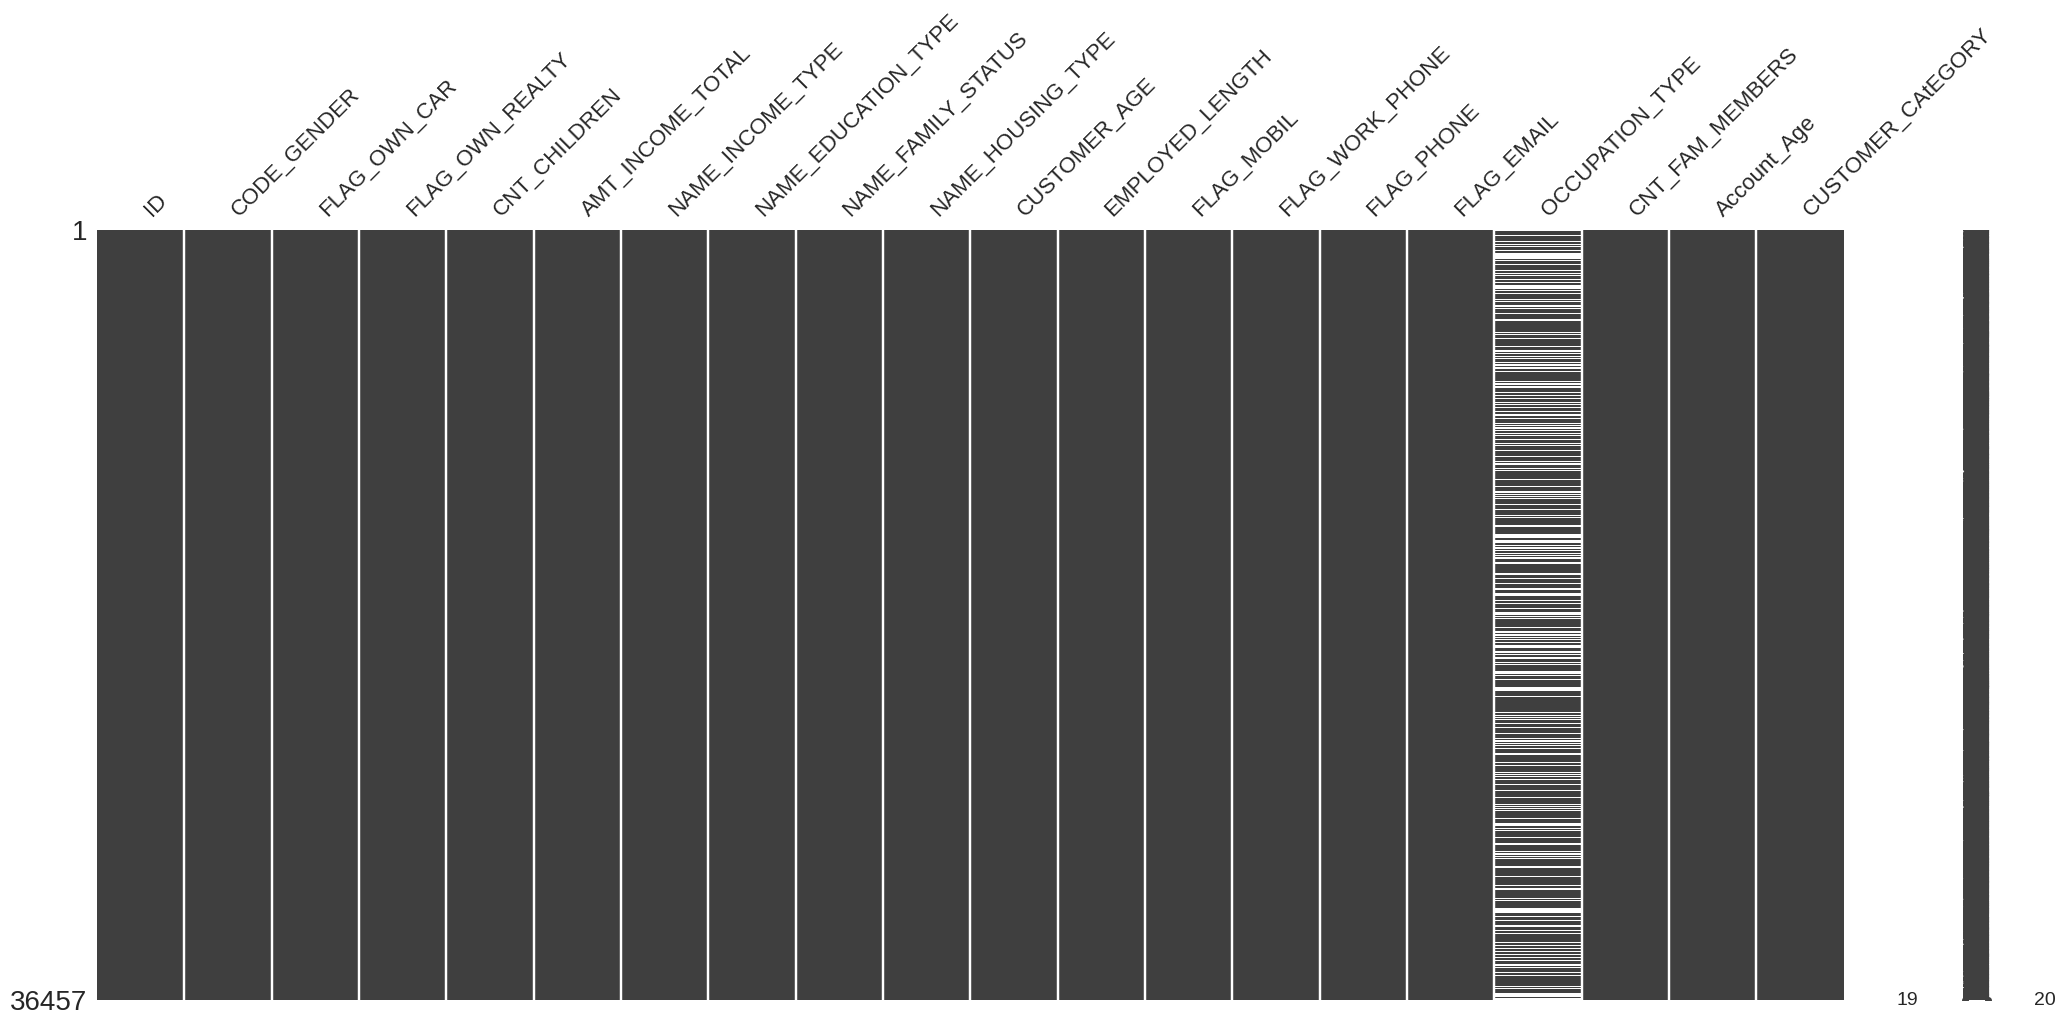

In [83]:
msno.matrix(application_record)

<Axes: >

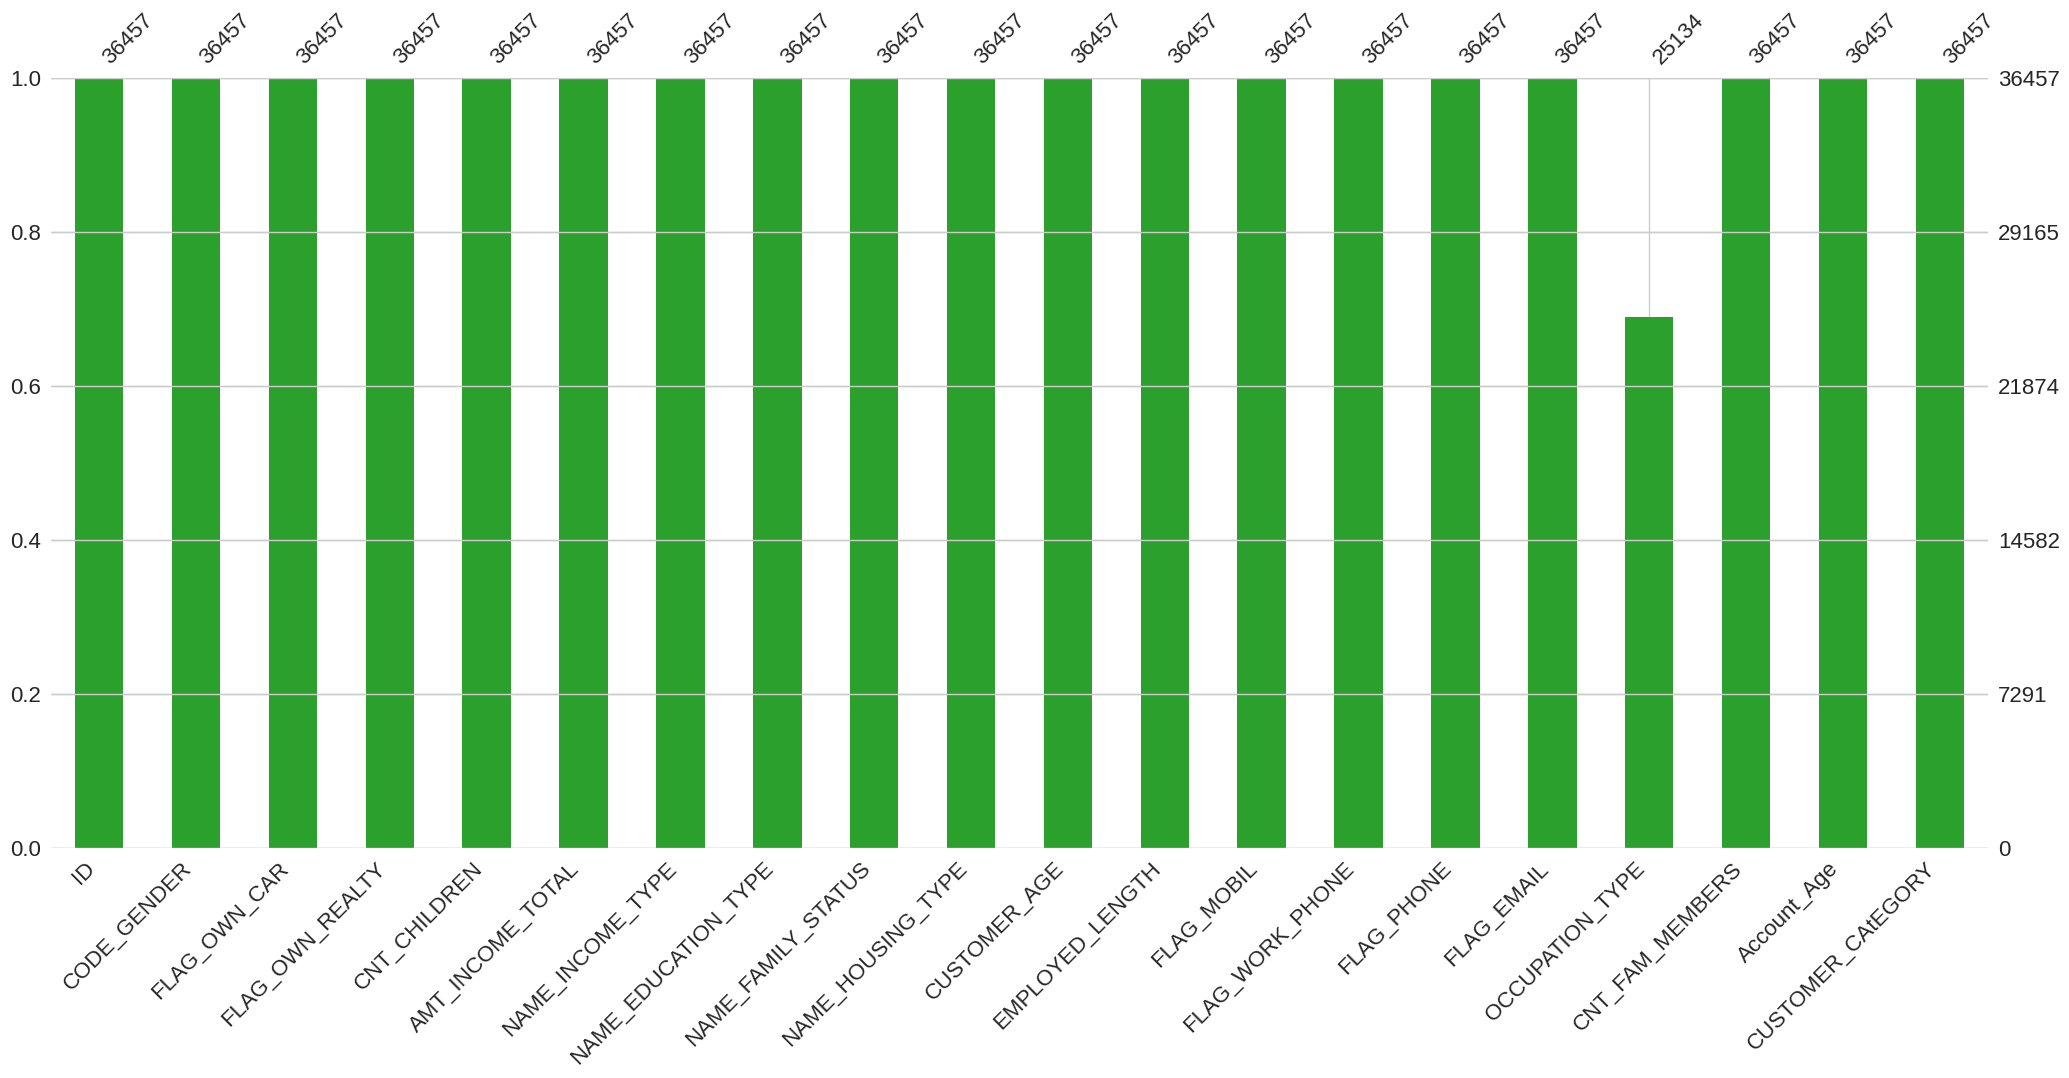

In [84]:
msno.bar(application_record , color="tab:green")

#### missing values in occupation type less than 31.6% we can impute those values

In [85]:
# cause value of missing morethan 10% we can't fill by one value
fill_miss = application_record[['OCCUPATION_TYPE']].value_counts().reset_index()
fill_miss

,OCCUPATION_TYPE,count
0,Laborers,6211
1,Core staff,3591
2,Sales staff,3485
3,Managers,3012
4,Drivers,2138
5,High skill tech staff,1383
6,Accountants,1241
7,Medicine staff,1207
8,Cooking staff,655
9,Security staff,592


In [86]:
# we will randomly with will all values in column
fill_list = []
for idx, ele in enumerate(fill_miss['OCCUPATION_TYPE']):
    fill_list.append(ele)

fill_list

['Laborers',
 'Core staff',
 'Sales staff',
 'Managers',
 'Drivers',
 'High skill tech staff',
 'Accountants',
 'Medicine staff',
 'Cooking staff',
 'Security staff',
 'Cleaning staff',
 'Private service staff',
 'Low-skill Laborers',
 'Waiters/barmen staff',
 'Secretaries',
 'HR staff',
 'Realty agents',
 'IT staff']

In [87]:
application_record['OCCUPATION_TYPE'].fillna(pd.Series(np.random.choice(fill_list, size= application_record.shape[0])),inplace = True)

In [88]:
# we filled nulls
application_record['OCCUPATION_TYPE'].isnull().sum()

0

### Encoding

In [89]:
le = LabelEncoder()

In [90]:
# Encode for cat_cols
for i in application_record.columns:
  if application_record[i].dtype == 'object':
    application_record[i] = le.fit_transform(application_record[i]).astype('int64')


application_record.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,1,1,1,0,427500.0,4,1,0,3,32,12.44,0,1,0,0,1,2,-15.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,3,32,12.44,0,1,0,0,11,2,-14.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,5,58,3.10,0,0,0,0,16,2,-29.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,5,52,8.35,0,0,1,1,14,1,-4.0,1


In [91]:
# check correlation between varaibles
corr_matrix = application_record.corr()
corr_matrix

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
ID,1.000000,0.012022,-0.011163,-0.098851,0.028878,-0.017667,0.023193,-0.009211,-0.004336,-0.023312,-0.056346,-0.005741,NaN,0.079215,0.009879,-0.046979,0.005125,0.026624,0.001364,-0.015588
CODE_GENDER,0.012022,1.000000,0.361379,-0.050758,0.077690,0.197805,0.105639,0.005880,-0.099289,-0.035002,-0.202286,-0.031725,NaN,0.064994,-0.026833,-0.003284,-0.026114,0.110782,0.005079,-0.015292
FLAG_OWN_CAR,-0.011163,0.361379,1.000000,-0.015185,0.105839,0.215506,0.054817,-0.101272,-0.121716,-0.003806,-0.156825,0.006256,NaN,0.021644,-0.014019,0.021750,-0.044307,0.151814,-0.029627,0.004341
FLAG_OWN_REALTY,-0.098851,-0.050758,-0.015185,1.000000,-0.000575,0.032719,-0.046543,0.010997,0.022993,0.158517,0.129237,-0.033647,NaN,-0.207732,-0.066601,0.052194,0.012579,-0.005723,0.006476,0.022247
CNT_CHILDREN,0.028878,0.077690,0.105839,-0.000575,1.000000,0.033691,0.109401,-0.049823,-0.160386,-0.015129,-0.339310,0.043352,NaN,0.048091,-0.016291,0.015960,-0.017338,0.889114,-0.003984,0.000308
AMT_INCOME_TOTAL,-0.017667,0.197805,0.215506,0.032719,0.033691,1.000000,-0.072974,-0.226931,-0.001191,-0.009243,-0.067622,0.087139,NaN,-0.037746,0.017245,0.086681,-0.006486,0.023750,-0.017494,0.001057
NAME_INCOME_TYPE,0.023193,0.105639,0.054817,-0.046543,0.109401,-0.072974,1.000000,0.057225,-0.048532,-0.022848,-0.213533,0.192958,NaN,0.165785,0.006529,-0.019567,-0.035250,0.109313,-0.000846,0.006049
NAME_EDUCATION_TYPE,-0.009211,0.005880,-0.101272,0.010997,-0.049823,-0.226931,0.057225,1.000000,0.007747,-0.008050,0.169541,-0.016356,NaN,-0.021092,-0.044875,-0.098457,0.066321,-0.041344,0.014839,0.005215
NAME_FAMILY_STATUS,-0.004336,-0.099289,-0.121716,0.022993,-0.160386,-0.001191,-0.048532,0.007747,1.000000,-0.025295,0.106505,-0.049983,NaN,-0.063103,-0.015065,-0.010895,0.004965,-0.546511,0.030053,-0.021266
NAME_HOUSING_TYPE,-0.023312,-0.035002,-0.003806,0.158517,-0.015129,-0.009243,-0.022848,-0.008050,-0.025295,1.000000,0.077884,-0.003695,NaN,-0.008929,0.018242,0.007580,-0.000061,0.003455,-0.009276,0.012710


<Axes: >

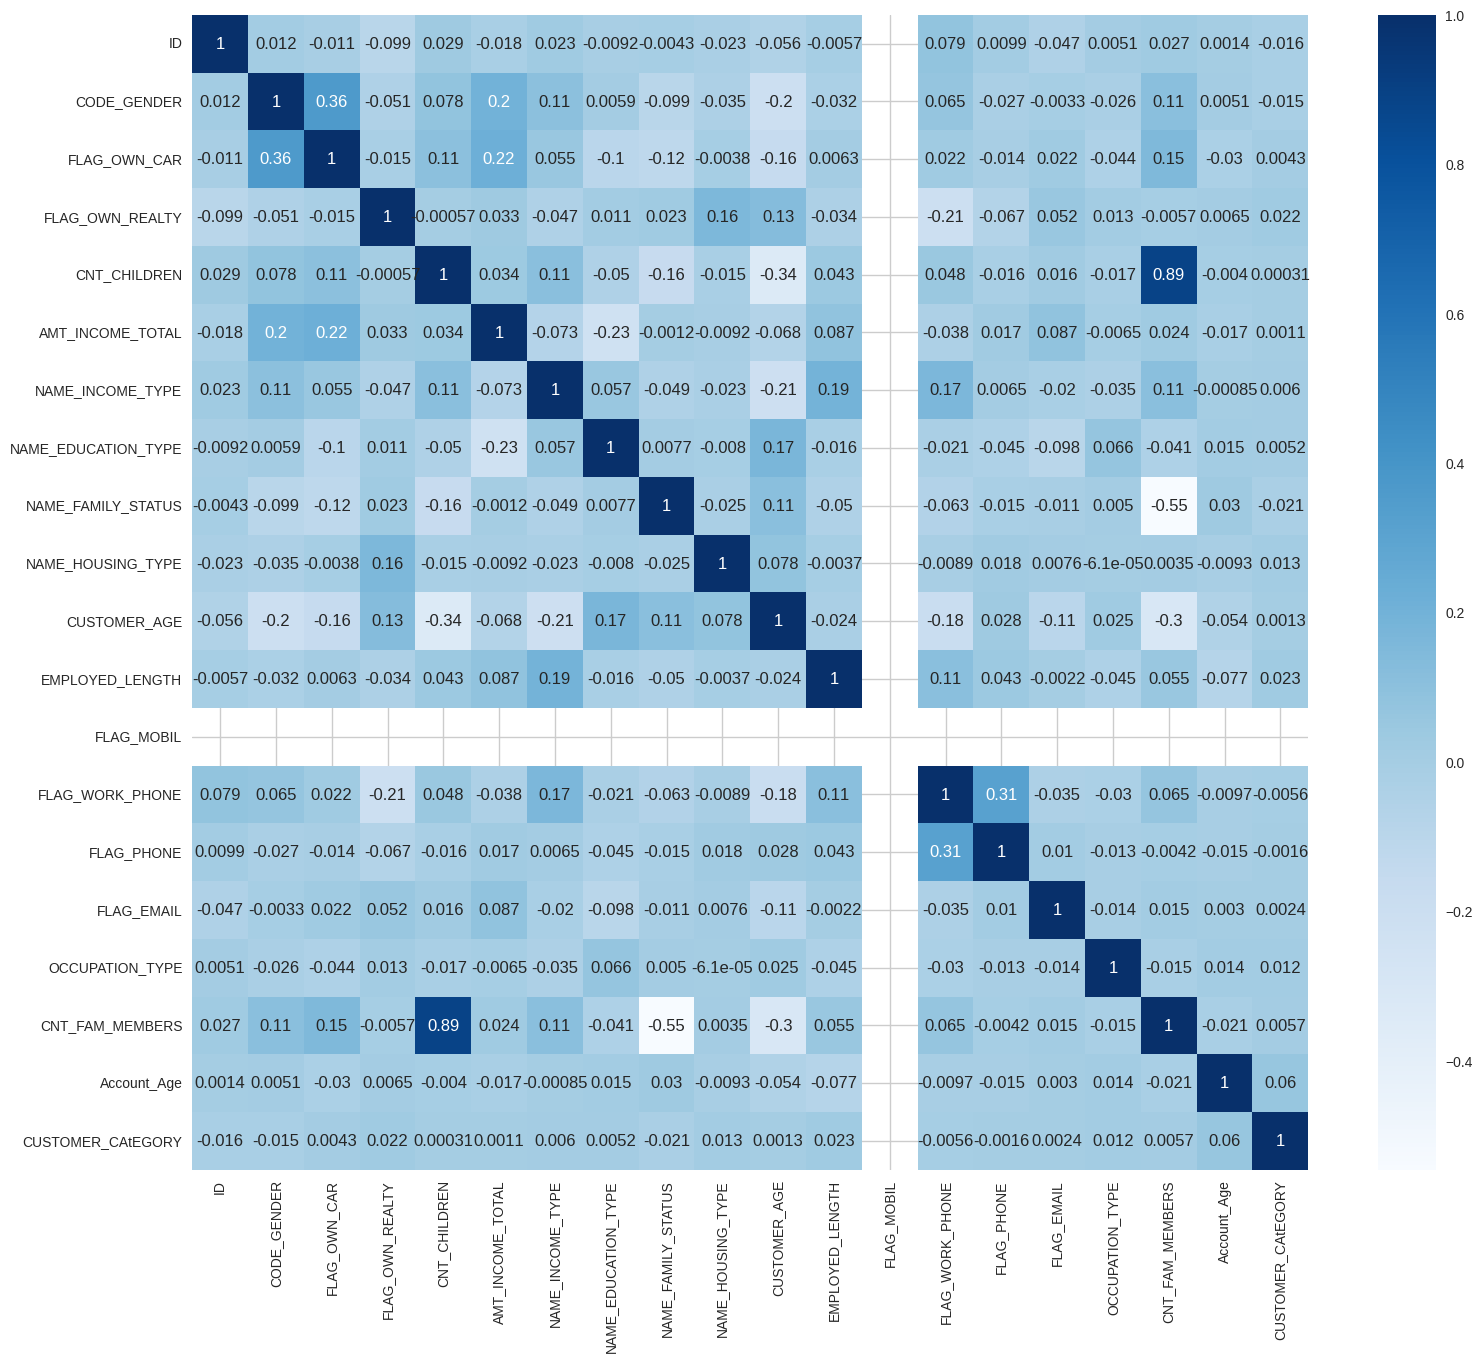

In [92]:
plt.figure(figsize = (18,15))
sns.heatmap(application_record.corr() , annot = True , cmap = 'Blues')

### Dropping Some Columns
- ID: ID is not helpful for prediction
- FLAG_MOBIL: this column has one value = 1 means all customers have phone so this feature doesn't give us any information
- Account Age: these feature is unknown while we applying for a creit card
- CNT_CHILDREN: is highly correlated with Family member count, and to avoid multicollinearity, we will drop it.

In [93]:
# lets drop Some Uncesscary Columns
application_record.drop(['ID', 'FLAG_MOBIL','Account_Age','CNT_CHILDREN'],axis = 1, inplace = True)

### Handling Outliers

In [94]:
application_record.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,int64
NAME_EDUCATION_TYPE,int64
NAME_FAMILY_STATUS,int64
NAME_HOUSING_TYPE,int64
CUSTOMER_AGE,int64
EMPLOYED_LENGTH,float64


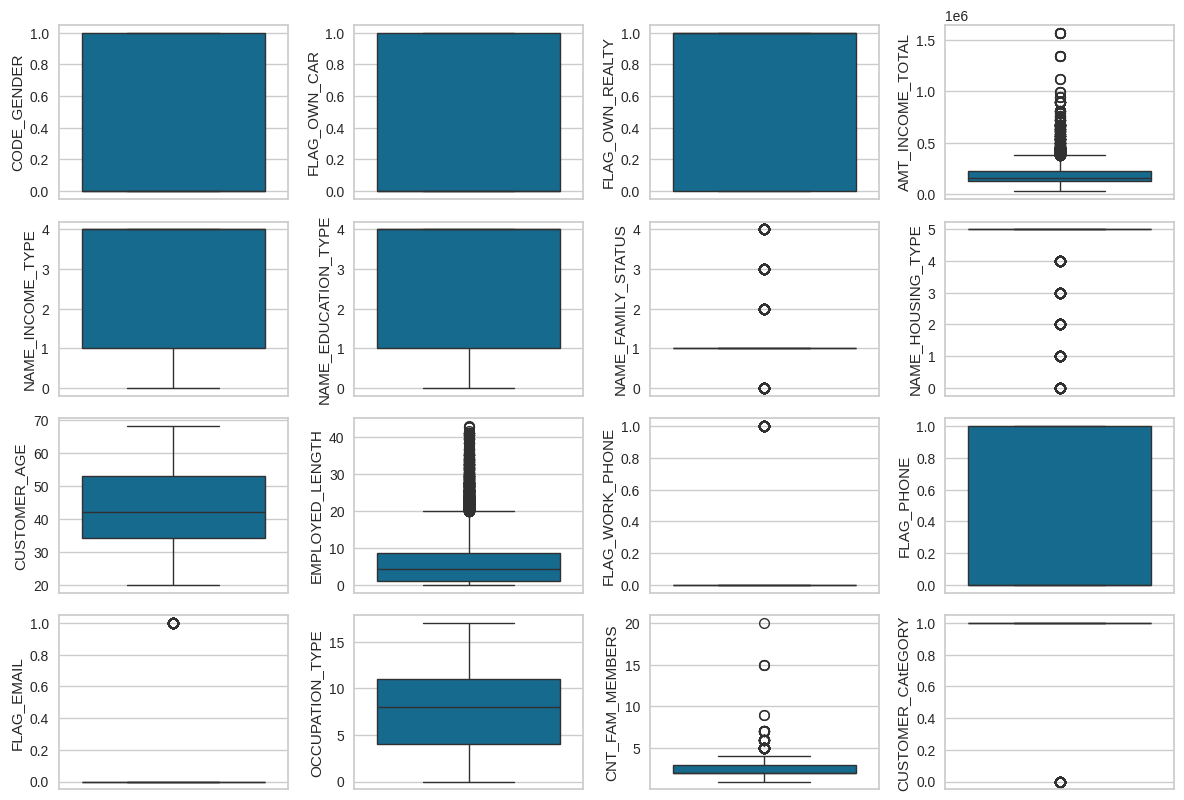

In [95]:
# check there is outliers in each column or not
fig = plt.figure(figsize=(12,18))
for i in range(len(application_record.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=application_record.iloc[:,i])

plt.tight_layout()
plt.show()

In [96]:
# Lets Detect True Outliers
def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define Upper and Lower Fence
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    # Remove Outliers from column
    new_df = df[ (df[column_name] > Lower) & (df[column_name] < Upper) ]

    # return new column
    return new_df

In [97]:
# Call handle_outliers Function to remove outliers in columns
cols_outliers = ['AMT_INCOME_TOTAL', 'EMPLOYED_LENGTH']

# lets give our column to the function
for col in cols_outliers:
    application_record = handle_outliers(application_record, col)

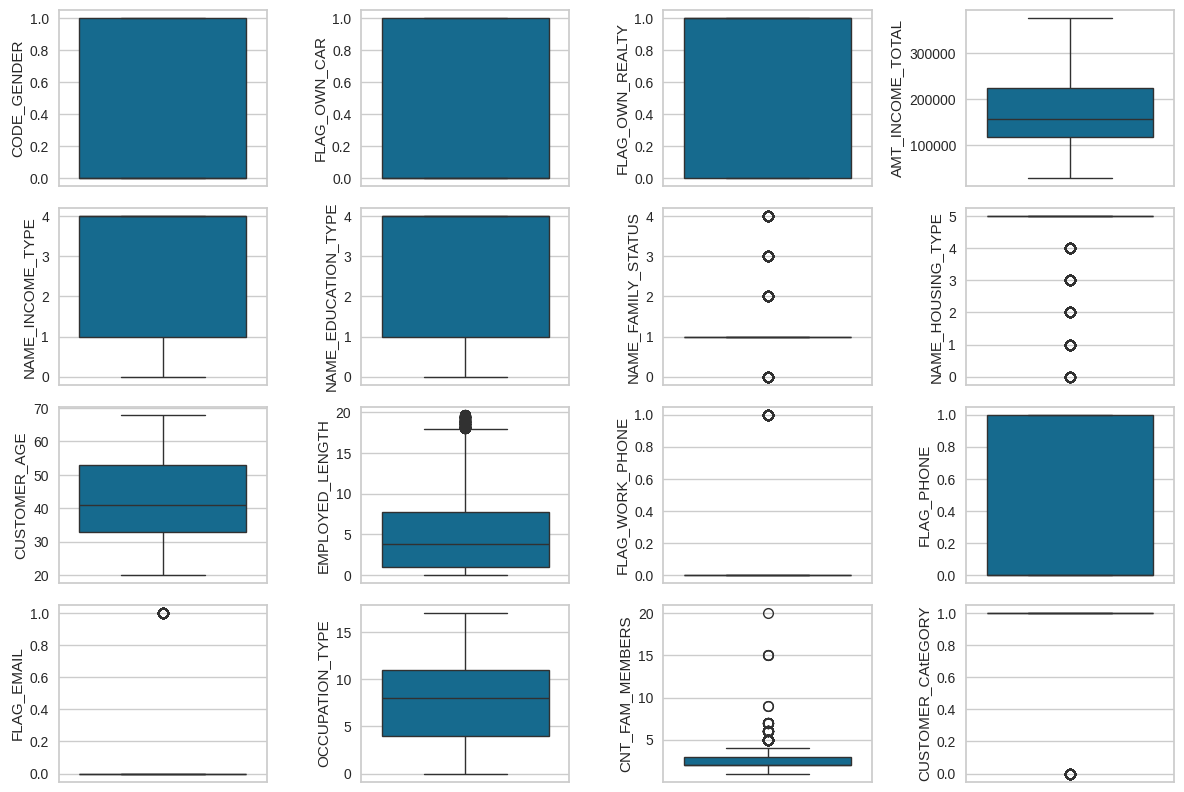

In [98]:
# check columns after removing outliers
fig = plt.figure(figsize=(12,18))
for i in range(len(application_record.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=application_record.iloc[:,i])

plt.tight_layout()
plt.show()

In [99]:
# Check Imbalance for out target column
total_records = len(application_record)
customer_type_counts = application_record["CUSTOMER_CAtEGORY"].value_counts()
customer_type_percent = (customer_type_counts[1] / total_records) * 100

fig = px.pie(names= ['good','bad'], values=[customer_type_percent,100 - customer_type_percent],
             title="<b>Check Imbalance In our Target",
             hole=0.4,
             color_discrete_sequence=["#3366FF", "#d62728"])

# Customize the plot
fig.update_traces(textinfo="percent+label", pull = [0.1,0])
fig.update_layout(title_font_color = 'black',
title_font_size = 27,
hovermode='x',
title_x = 0.5,
height = 600)
fig.show()

### Handling Imbalanced Data

In [100]:
X = application_record.drop('CUSTOMER_CAtEGORY', axis = 1)
Y = application_record['CUSTOMER_CAtEGORY']

In [101]:
smt = SMOTETomek(random_state=42)
x_over, y_over = smt.fit_resample(X, Y)

In [102]:
x_over.shape, y_over.shape

((65114, 15), (65114,))

### Split Data

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

In [104]:
# Now lets Normalize our Data to make features in same range to help models train faster
Mn = MinMaxScaler()
x_train_scaled = Mn.fit_transform(x_train)
x_test_scaled = Mn.fit_transform(x_test)

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Modeling</center></h1>

In [105]:
# take instances from classifiers Model
log_reg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
Xgb = XGBClassifier()
ada = AdaBoostClassifier()

In [106]:
# Models
classifiers_models = [log_reg, svm, dt, rf, Xgb, ada]

# Models Name
classifiers_models_name = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

# lets feed train data to each model
for clf in classifiers_models:
    clf.fit(x_train_scaled, y_train)

In [107]:
train_acc_list = []
test_acc_list = []

# lets make our models predict target
for clf, name in zip(classifiers_models, classifiers_models_name):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)

    # print each model and each score on data
    print(f'Using Model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled,y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled,y_test)}')

    # Lets check train and test accuracy
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred)}')

    # append them to our train acc and test acc lists
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred))

    # to make space between results of each model
    print('')
    print('*' * 60)
    print('')

Using Model: Logistic Regression
Training Score: 0.6976677856030189
Test Score: 0.6953672894804198
Acc Train: 0.6976677856030189
Acc Test: 0.6953672894804198

************************************************************

Using Model: Support Vector Machine
Training Score: 0.8438096491805437
Test Score: 0.8422830816483236
Acc Train: 0.8438096491805437
Acc Test: 0.8422830816483236

************************************************************

Using Model: Decision Tree
Training Score: 0.9940542793830492
Test Score: 0.9220885589966726
Acc Train: 0.9940542793830492
Acc Test: 0.9220885589966726

************************************************************

Using Model: Random Forest
Training Score: 0.9940323394545734
Test Score: 0.964883542359867
Acc Train: 0.9940323394545734
Acc Test: 0.964883542359867

************************************************************

Using Model: XGBClassifier
Training Score: 0.979749446016806
Test Score: 0.9541847965190683
Acc Train: 0.979749446016806
Acc Te

In [108]:
# make dataframe contains our models accuray in test and train, index will be models name
all_models = pd.DataFrame({'Train_Accuracy':train_acc_list, 'Test_Accuracy':test_acc_list}, index = classifiers_models_name)
all_models

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.697668,0.695367
Support Vector Machine,0.843810,0.842283
Decision Tree,0.994054,0.922089
Random Forest,0.994032,0.964884
XGBClassifier,0.979749,0.954185
AdaBoostClassifier,0.755436,0.755465


In [109]:
# lets visualize our model results

# Models Vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuracy'], y = all_models.index ,color=all_models['Train_Accuracy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracies',
yaxis_title='Models Name',
)
fig.show()

# Models Vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuracy'], y = all_models.index ,color=all_models['Test_Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracies',
yaxis_title='Models Name',
)
fig.show()

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Evaluation</center></h1>

Using Model: Logistic Regression
Accuracy: 0.6953672894804198
ROC Area Under Curve:0.6955885320556243
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      9808
           1       0.67      0.75      0.71      9727

    accuracy                           0.70     19535
   macro avg       0.70      0.70      0.69     19535
weighted avg       0.70      0.70      0.69     19535



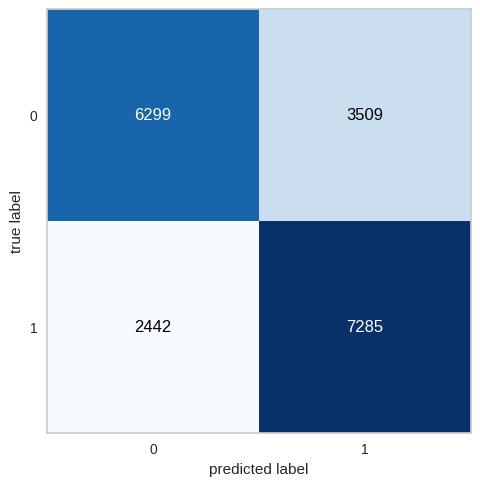

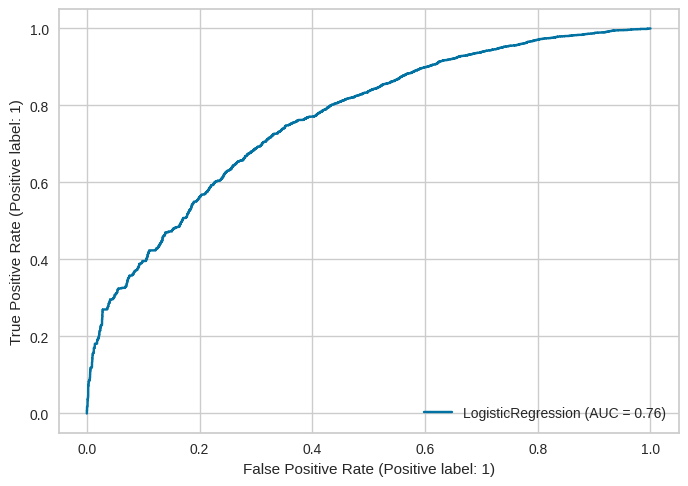

************************************************************
Using Model: Support Vector Machine
Accuracy: 0.8422830816483236
ROC Area Under Curve:0.8422725164528327
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      9808
           1       0.84      0.84      0.84      9727

    accuracy                           0.84     19535
   macro avg       0.84      0.84      0.84     19535
weighted avg       0.84      0.84      0.84     19535



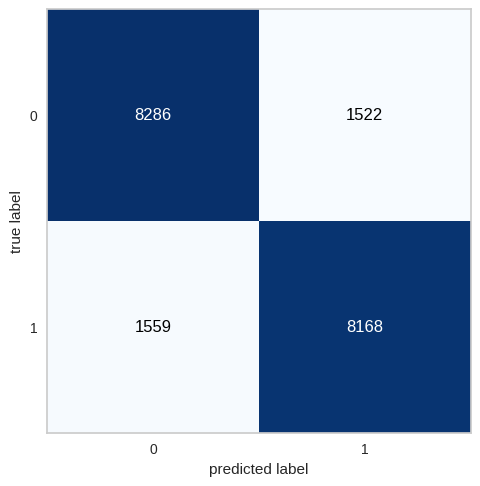

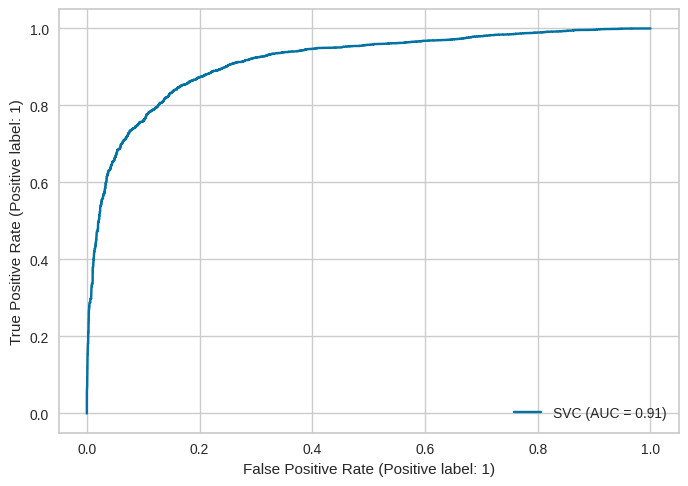

************************************************************
Using Model: Decision Tree
Accuracy: 0.9160993089326849
ROC Area Under Curve:0.9162619424648533
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      9808
           1       0.89      0.96      0.92      9727

    accuracy                           0.92     19535
   macro avg       0.92      0.92      0.92     19535
weighted avg       0.92      0.92      0.92     19535



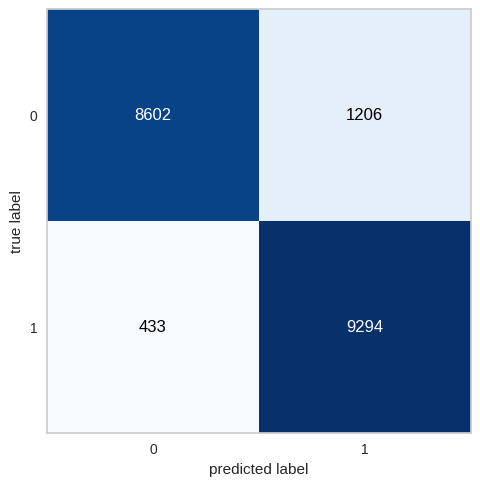

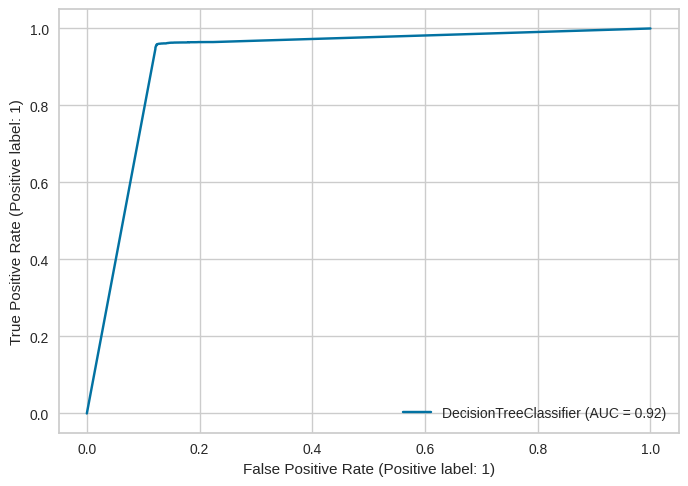

************************************************************
Using Model: Random Forest
Accuracy: 0.968415664192475
ROC Area Under Curve:0.9684730678099389
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      9808
           1       0.96      0.98      0.97      9727

    accuracy                           0.97     19535
   macro avg       0.97      0.97      0.97     19535
weighted avg       0.97      0.97      0.97     19535



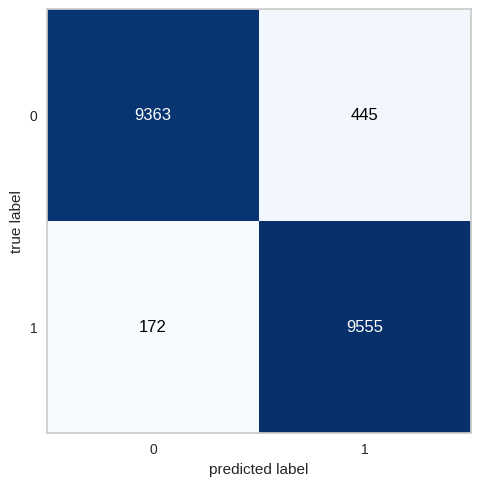

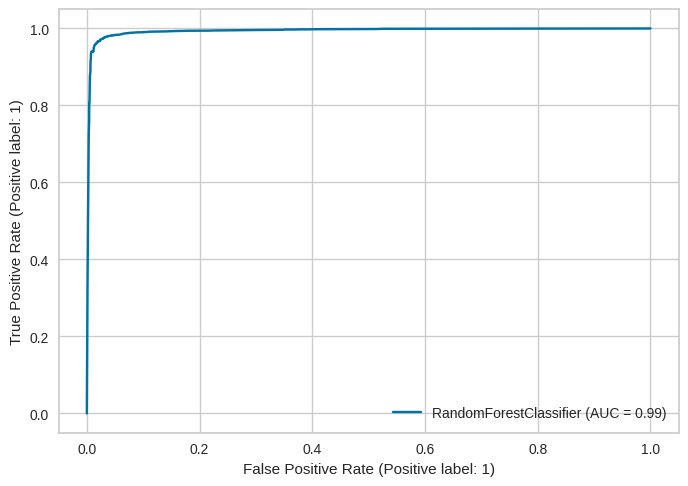

************************************************************
Using Model: XGBClassifier
Accuracy: 0.9541847965190683
ROC Area Under Curve:0.9542160598951708
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9808
           1       0.95      0.96      0.95      9727

    accuracy                           0.95     19535
   macro avg       0.95      0.95      0.95     19535
weighted avg       0.95      0.95      0.95     19535



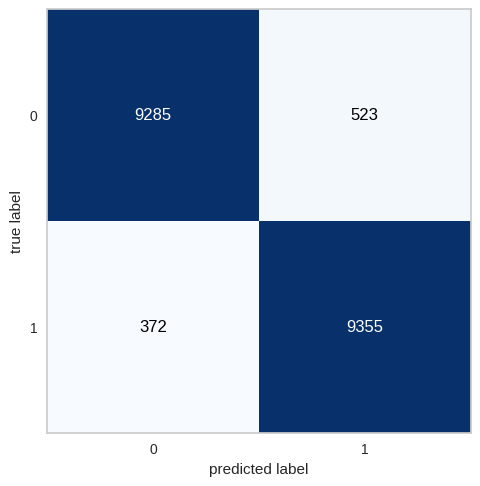

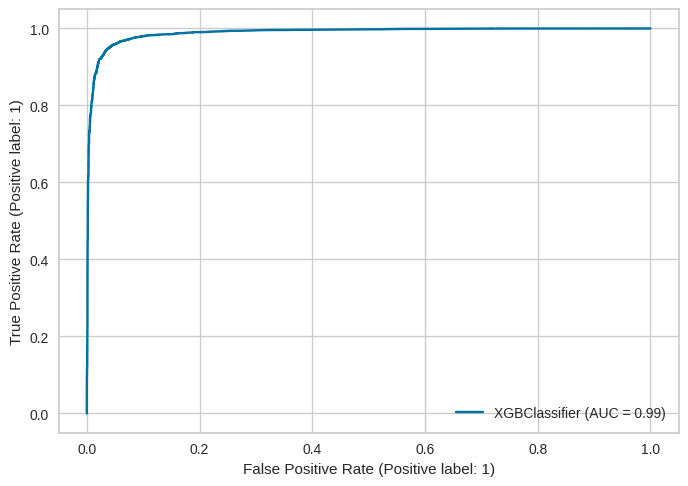

************************************************************
Using Model: AdaBoostClassifier
Accuracy: 0.7554645508062452
ROC Area Under Curve:0.7555535281202941
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      9808
           1       0.74      0.78      0.76      9727

    accuracy                           0.76     19535
   macro avg       0.76      0.76      0.76     19535
weighted avg       0.76      0.76      0.76     19535



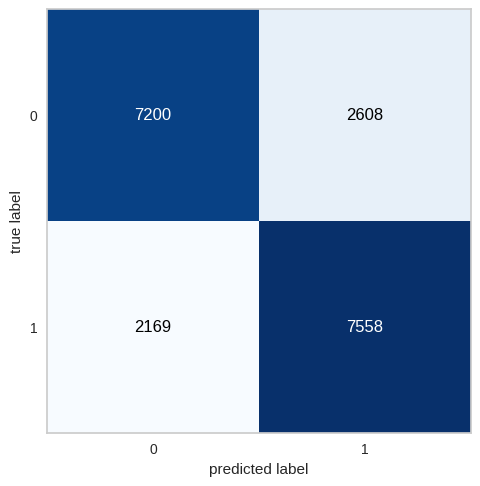

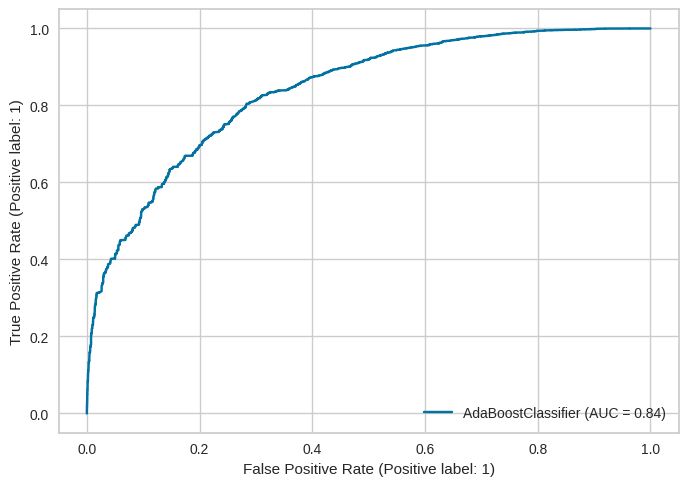

************************************************************


In [110]:
# Get Evaluation metrices for our models
for clf, name in zip(classifiers_models, classifiers_models_name):

    # Which Model running now
    model = clf
    print(f'Using Model: {name}')

    # Make model train or fit data, then predict
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    # Get accuarcy and area under curve of roc for each model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'ROC Area Under Curve:{roc_auc}')

    # Get classification report
    print(classification_report(y_test, y_pred))

    # Get confusion matrix
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

    # Display ROC Curve
    RocCurveDisplay.from_estimator(model, x_test_scaled, y_test)
    plt.show()

    print('*'*60)

In [111]:
# Saving Trained Random Forest Model and Noramlization function for Deployment
import joblib

# Save the model and the scaler together
joblib.dump([rf,Mn],'trained_random_forest.joblib')

['trained_random_forest.joblib']